Изработил: Стефан Крстевски, 223/2017

# <center>Проектна задача по Машинско учење</center>
## <center>Kласификација на небесни објекти</center>

##### Целта на овој проект е да се создаде систем за класификација на небесните објекти врз основа на нивните спектрални карактеристики. Проектот ќе вклучува користење на Python за анализа и визуелизација на податоците од ѕвездените спектри и развој на модел за класификација користејќи алгоритми за машинско учење. Моделот ќе биде дизајниран да ги подредува објектите во три главни групи: галаксии, квазари и ѕвезди. Проектот има за цел да обезбеди точна и ефикасна алатка за астрономите да ги класифицираат и проучуваат небесните објекти и да го продлабочат нашето разбирање за структурата и еволуцијата на универзумот.

## Содржина

0. [Вчитување на потребни библиотеки](#bib)
1. [Опис на проблемот кој се решава](#opis)
     - [Податочно множество](#pod)
     - [Визуелизација на податоците](#viz)
     - [Опис на користените метрики](#met)
2. [Користени пристапи од машинско учење за решавање на проблемот](#pristapi)
     - [Опис на алгоритам 1](#prist1)
     - [Опис на алгоритам 2](#prist2)
     - ...
     - [Опис на алгоритам n](#pristn)
3. [Решавање на проблемот](#res)
     - [Решавање со алгоритам 1](#res1)
     - [Решавање со алгоритам 2](#res2)
     - ...
     - [Решавање со алгоритам n](#resn)
4. [Споредба на резултатите](#spor)
5. [Пост-оптимизирачка анализа](#postop)
6. [Заклучок](#zakl)
7. [Користена литература и ресурси](#resources)

## 0. Вчитување на потребни библиотеки <a id='bib'></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

## 1. Опис на проблемот кој се решава <a id='opis'></a>

Проблемот се состои од големо множество на небесните објекти и нивна класификација во зависност од нивните спектрални карактеристики.

Мотивација за избирање на овој проблем е поради мојот интерес кон вселената и небесните тела во нејзе.

### 1.1. Податочно множество <a id='pod'></a>

In [44]:
ignored_columns = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']
df = pd.read_csv('star_classification.csv', usecols=lambda col: col not in ignored_columns)

Колоните кои се игнорираат при читањето на фајлот се оние колони кој немаат никаква практична примена во проектната задачи поради нивната природа како идетификациски броеви или сл.

obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
alpha = Right Ascension angle (at J2000 epoch)
delta = Declination angle (at J2000 epoch)
u = Ultraviolet filter in the photometric system
g = Green filter in the photometric system
r = Red filter in the photometric system
i = Near Infrared filter in the photometric system
z = Infrared filter in the photometric system
run_ID = Run Number used to identify the specific scan
rereun_ID = Rerun Number to specify how the image was processed
cam_col = Camera column to identify the scanline within the run
field_ID = Field number to identify each field
spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
class = object class (galaxy, star or quasar object)
redshift = redshift value based on the increase in wavelength
plate = plate ID, identifies each plate in SDSS
MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

### 1.2. Визуелизација на податоците <a id='viz'></a>

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   class     100000 non-null  object 
 8   redshift  100000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.9+ MB


In [51]:
display(df[0:10].T)

,0,1,2,3,4,5,6,7,8,9
alpha,135.689107,144.826101,142.18879,338.741038,345.282593,340.995121,23.234926,5.433176,200.290475,39.149691
delta,32.494632,31.274185,35.582444,-0.402828,21.183866,20.589476,11.418188,12.065186,47.199402,28.102842
u,23.87882,24.77759,25.26307,22.13682,19.43718,23.48827,21.46973,22.24979,24.40286,21.74669
g,22.2753,22.83188,22.66389,23.77656,17.58028,23.33776,21.17624,22.02172,22.35669,20.03493
r,20.39501,22.58444,20.60976,21.61162,16.49747,21.32195,20.92829,20.34126,20.61032,19.17553
i,19.16573,21.16812,19.34857,20.50454,15.97711,20.25615,20.60826,19.48794,19.4649,18.81823
z,18.79371,21.61427,18.94827,19.2501,15.54461,19.54544,20.42573,18.84999,18.95852,18.65422
class,GALAXY,GALAXY,GALAXY,GALAXY,GALAXY,QSO,QSO,GALAXY,GALAXY,STAR
redshift,0.634794,0.779136,0.644195,0.932346,0.116123,1.424659,0.586455,0.477009,0.660012,-0.000008


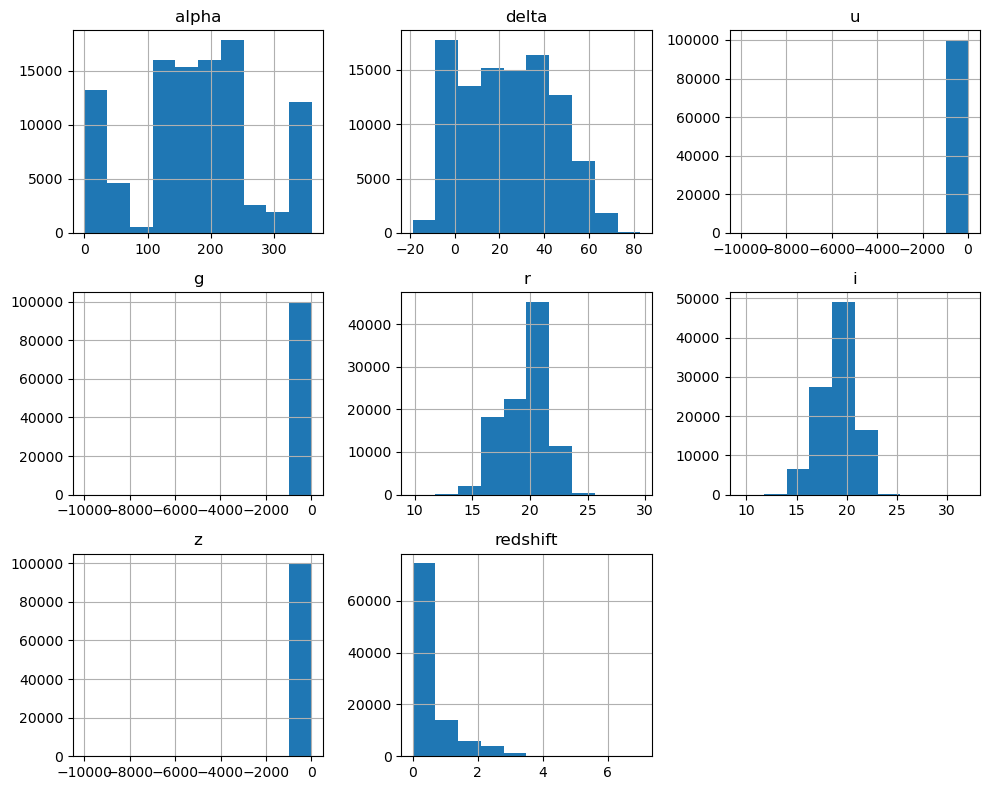

In [47]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Histograms: You can create histograms to visualize the distribution of numerical columns in your DataFrame. This helps you understand the range and frequency of values.

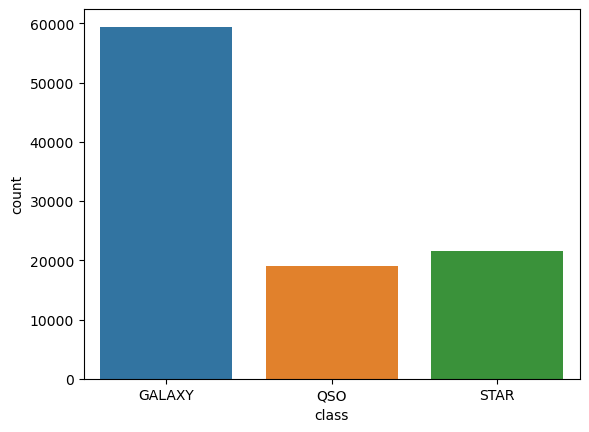

In [48]:
sns.countplot(data=df, x='class')
plt.show()

# Count plots: Count plots are useful for visualizing the distribution of categorical variables. They show the frequency of each category in a bar chart.

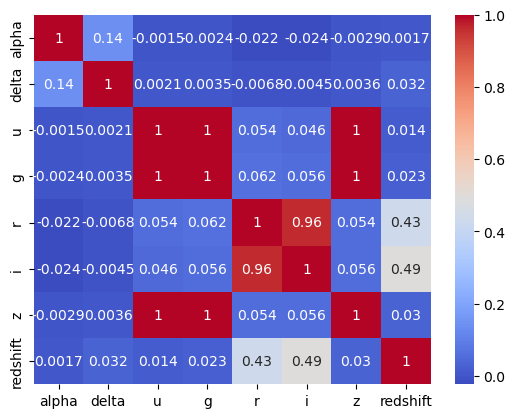

In [53]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 1.3. Опис на користените метрики <a id='met'></a>

df.info(): Овој метод обезбедува приказ на информации од дата сетот, вклучувајќи ги имињата на колоните, типовите на податоци и бројот на не-нулти вредности во секоја колона. Тоа е корисно за да се добие преглед на податоците и да се идентификуваат вредностите што недостасуваат.

df[0:10].T: Овој код ги избира првите десет редови од дата сетот и го транспонира користејќи го атрибутот .T.

df.hist(figsize=(10, 8)): Овој метод генерира хистограми за секоја нумеричка колона од дата сетот. Хистограмите се користат за да се визуелизира распределбата на вредностите во една променлива.

sns.countplot(data=df, x='class'): Овој Seaborn метод создава countplot, што е табла што го прикажува бројот на набљудувања во секоја категорија на категорична променлива. Во овој случај, го прикажува бројот на различни класи присутни во колоната „class“.

correlation_matrix = df.corr(numeric_only=True): Овој код ја пресметува корелацијата помеѓу нумеричките колони во дата сетот. Numeric_only=True параметарот гарантира дека само нумеричките колони се вклучени во пресметката на корелацијата.

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm'): Овој Seaborn метод создава матрицата за корелација. Oбезбедува визуелна ознака на корелација , овозможувајќи да идентификува односи помеѓу различни променливи.

## 2. Користени пристапи од машинско учење за решавање на проблемот <a id='pristapi'></a>

## 6. Заклучок <a id='zakl'></a>

## 7. Користена литература и ресурси <a class="anchor" id="resources"></a>

1. https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17